In [1]:
from selenium import webdriver

In [2]:
import time

In [3]:
from bs4 import BeautifulSoup

In [4]:
driver = webdriver.Chrome('./chromedriver.exe')

In [5]:
driver.get('https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210719')

'<html lang="ko"><head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n\n\n<meta property="me2:image" content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg">\n<meta property="me2:post_tag" content="네이버영화 ">\n<meta property="me2:category1" content="네이버영화">\n<meta property="me2:category2" content="">\n\n\n\n\n\n\t\n\t\n\t\t<meta property="og:title" content="랭킹 : 네이버 영화">\n\t\t\n\t\t\t\n\t\t\t\t<meta property="og:description" content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공">\n\t\t\t\n\t\t\t\n\t\t\n\t\n\t\n\t\n\t\n\t\n\n\n<meta property="og:type" content="article">\n<meta property="og:url" content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&amp;date=20210719">\n\n\t\n\t\n\t\t<meta property="og:image" content="http://static.naver.net/m/movie/icons/OG_270_270.png"><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->\n\t\n\n\n<meta property="og:article:thumbnailUrl" content="http:/
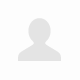
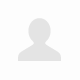

In [6]:
html = driver.page_source
html

<html lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image"/>
<meta content="네이버영화 " property="me2:post_tag"/>
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&amp;date=20210719" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta content="
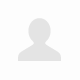
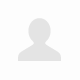

In [7]:
soup = BeautifulSoup(html, 'html.parser')
soup

In [8]:
movies = soup.select('div.tit5 > a')
movie = movies[0]
movie

<a href="/movie/bi/mi/basic.naver?code=171539" title="그린 북">그린 북</a>

In [9]:
title = movie.text.strip()
title

'그린 북'

In [10]:
href = movie['href']
href

'/movie/bi/mi/basic.naver?code=171539'

href="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210719&page=2"

In [16]:
uri = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210719&page='
data = [] # or list()

for page in range(1,21):
    target = uri+str(page)
    print(target)
    driver.get(target)
    html = driver.page_source
    soup = BeautifulSoup(html,'html.parser')
    movies = soup.select('div.tit5 > a')

    for movie in movies:
        title = movie.text.strip()
        href = movie['href']
        data.append([title, href])
len(data)

https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210719&page=1
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210719&page=2
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210719&page=3
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210719&page=4
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210719&page=5
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210719&page=6
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210719&page=7
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210719&page=8
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210719&page=9
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210719&page=10
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210719&page=11
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=20210719&page=12
https://movie.naver.com/m

1000

In [17]:
data

[['그린 북', '/movie/bi/mi/basic.naver?code=171539'],
 ['가버나움', '/movie/bi/mi/basic.naver?code=174830'],
 ['디지몬 어드벤처 라스트 에볼루션 : 인연', '/movie/bi/mi/basic.naver?code=192613'],
 ['원더', '/movie/bi/mi/basic.naver?code=151196'],
 ['베일리 어게인', '/movie/bi/mi/basic.naver?code=144906'],
 ['먼 훗날 우리', '/movie/bi/mi/basic.naver?code=175092'],
 ['아일라', '/movie/bi/mi/basic.naver?code=169240'],
 ['당갈', '/movie/bi/mi/basic.naver?code=157243'],
 ['포드 V 페라리', '/movie/bi/mi/basic.naver?code=181710'],
 ['극장판 바이올렛 에버가든', '/movie/bi/mi/basic.naver?code=196843'],
 ['주전장', '/movie/bi/mi/basic.naver?code=179518'],
 ['쇼생크 탈출', '/movie/bi/mi/basic.naver?code=17421'],
 ['그대, 고맙소 : 김호중 생애 첫 팬미팅 무비', '/movie/bi/mi/basic.naver?code=196828'],
 ['터미네이터 2:오리지널', '/movie/bi/mi/basic.naver?code=10200'],
 ['나 홀로 집에', '/movie/bi/mi/basic.naver?code=10016'],
 ['덕구', '/movie/bi/mi/basic.naver?code=154667'],
 ['라이언 일병 구하기', '/movie/bi/mi/basic.naver?code=18988'],
 ['클래식', '/movie/bi/mi/basic.naver?code=35939'],
 ['월-E', '/movie/bi

In [18]:
import pandas as pd

In [20]:
pd_data=pd.DataFrame(data, columns=['Title','Movie code'])
pd_data

,Title,Movie code
0,그린 북,/movie/bi/mi/basic.naver?code=171539
1,가버나움,/movie/bi/mi/basic.naver?code=174830
2,디지몬 어드벤처 라스트 에볼루션 : 인연,/movie/bi/mi/basic.naver?code=192613
3,원더,/movie/bi/mi/basic.naver?code=151196
4,베일리 어게인,/movie/bi/mi/basic.naver?code=144906
...,...,...
995,크리스마스에 기적을 만날 확률,/movie/bi/mi/basic.naver?code=38106
996,아기배달부 스토크,/movie/bi/mi/basic.naver?code=144945
997,러덜리스,/movie/bi/mi/basic.naver?code=109626
998,레고 무비2,/movie/bi/mi/basic.naver?code=125438


In [23]:
pd_data['Movie code'] = pd_data['Movie code'].str[-6:]
pd_data

,Title,Movie code
0,그린 북,171539
1,가버나움,174830
2,디지몬 어드벤처 라스트 에볼루션 : 인연,192613
3,원더,151196
4,베일리 어게인,144906
...,...,...
995,크리스마스에 기적을 만날 확률,=38106
996,아기배달부 스토크,144945
997,러덜리스,109626
998,레고 무비2,125438
